In [1]:
import pandas as pd
import numpy as np
# import matplotlib pyplot commands
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt 

# Show Plots in the Notebook
%matplotlib inline

In [7]:
 plt.rcParams['figure.figsize']= (10, 8)   # set Chart Size
plt.rcParams['font.size'] = 14            # set Font size in Chart

# 'style' the plot like fivethirtyeight.com website
plt.style.use('bmh')

In [2]:
# Determines break-even price of fuel oil for a heat pump with a certain COP
# using electricity at a particular price.
def equiv_oil_price(cop, elec_price, oil_effic=0.82):
    heat_1_kWh = cop * 3412.
    oil_gal_1_kWh = heat_1_kWh / oil_effic / 135000
    return elec_price / oil_gal_1_kWh

In [4]:
equiv_oil_price(2.60, .1939, 0.8)

2.360582559292993

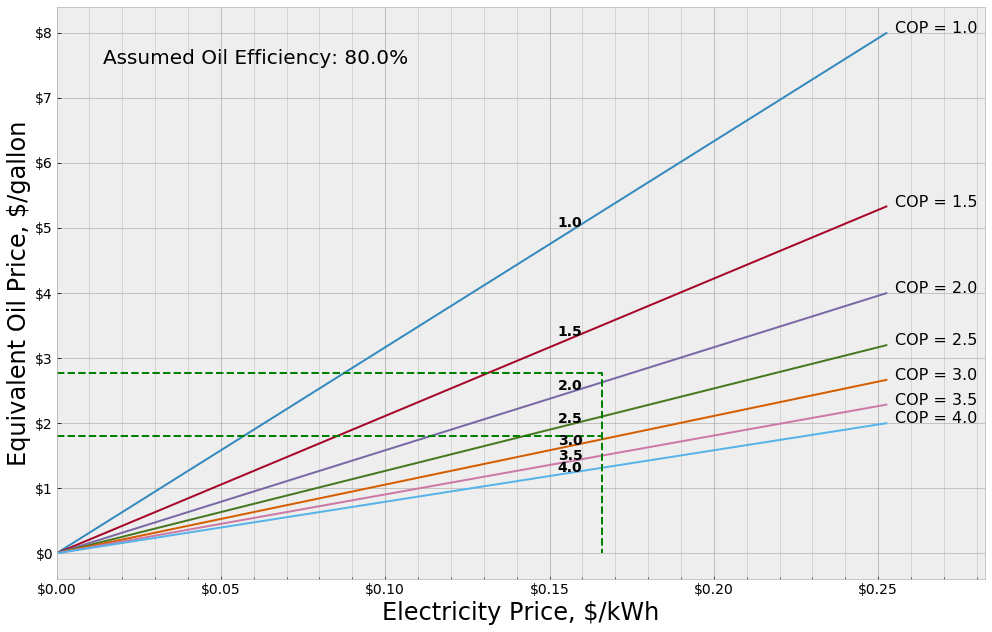

In [8]:
max_elec_price = 0.25
oil_effic = 0.8
minorLocator = MultipleLocator(0.01)


formatter2 = FuncFormatter(lambda x, pos: '$%.2f' % x)
formatter0 = FuncFormatter(lambda x, pos: '$%.0f' % x)

fig, ax = plt.subplots()
fig.set_size_inches(14, 9)
ax.xaxis.set_major_formatter(formatter2)
ax.yaxis.set_major_formatter(formatter0)
ax.xaxis.set_minor_locator(minorLocator)
#majorLocator = MultipleLocator(20)
plt.grid(b=True, which='minor', color='#BBBBBB', linestyle='-')
plt.grid(b=True, which='major', color='#999999', linestyle='-')

for cop in [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]:
    elec_prices = np.arange(0, max_elec_price+0.005, step=max_elec_price/100.)
    oil_equiv = [equiv_oil_price(cop, pr, oil_effic) for pr in elec_prices]
    plt.plot(elec_prices, oil_equiv, '-')
    plt.annotate(
        'COP = %.1f' % cop, 
        xy=(elec_prices[-1]*1.01, oil_equiv[-1]),
        fontsize=16
    )
    ix = int(len(elec_prices)*.6)
    plt.annotate(
        '%.1f' % cop, 
        xy=(elec_prices[ix], oil_equiv[ix] * 1.04), 
        weight='bold',
        zorder=10
    )
plt.xlim(0, max_elec_price*1.13)

plt.xlabel('Electricity Price, $/kWh', fontsize=24)
plt.ylabel('Equivalent Oil Price, $/gallon', fontsize=24)
plt.annotate(
    'Assumed Oil Efficiency: %.1f%%' % (oil_effic * 100.0),
    xy=(0.05, 0.9),
    xycoords='axes fraction',
    fontsize=20
)
plt.plot([0, 0.166, 0.166], [2.77, 2.77, 0], 'g--')
plt.plot([0, 0.166], [1.80, 1.80], 'g--')

#plt.title('Determine Equivalent Oil Price of a Heat Pump')
plt.tight_layout()

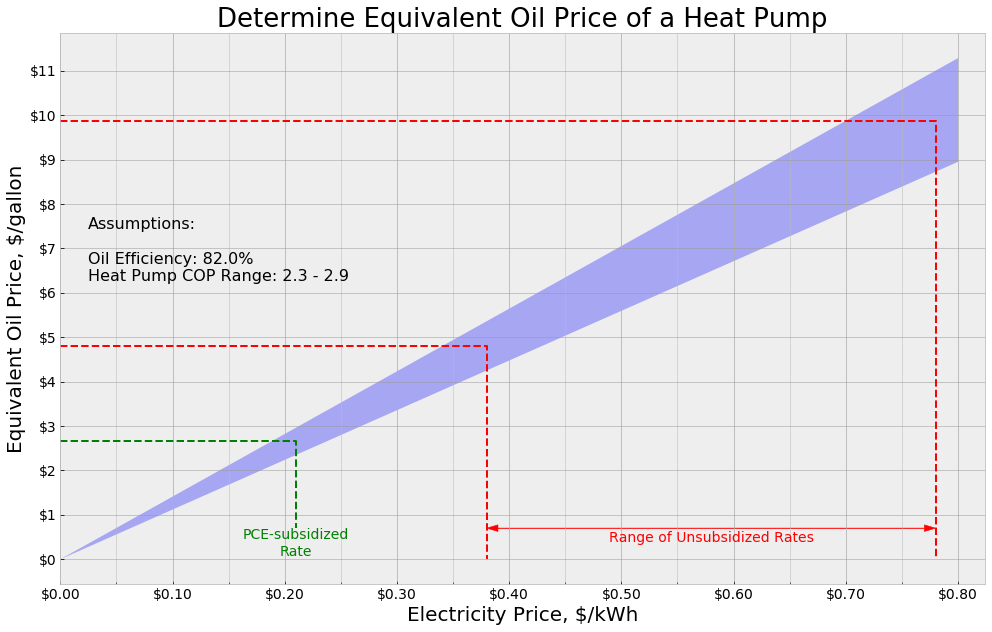

In [9]:
max_elec_price = 0.80
oil_effic = 0.82
cop_low = 2.3
cop_high = 2.9
minorLocatorX = MultipleLocator(0.05)
majorLocatorY = MultipleLocator(1.0)

formatter2 = FuncFormatter(lambda x, pos: '$%.2f' % x)
formatter0 = FuncFormatter(lambda x, pos: '$%.0f' % x)

fig, ax = plt.subplots()
fig.set_size_inches(14, 9)
ax.xaxis.set_major_formatter(formatter2)
ax.yaxis.set_major_formatter(formatter0)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
#majorLocator = MultipleLocator(20)

plt.grid(b=True, which='minor', color='#BBBBBB', linestyle='-')
plt.grid(b=True, which='major', color='#999999', linestyle='-')


elec_prices = np.arange(0, max_elec_price+.005, step=max_elec_price/100.)
oil_equiv_low = [equiv_oil_price(cop_high, pr, oil_effic) for pr in elec_prices]
oil_equiv_high = [equiv_oil_price(cop_low, pr, oil_effic) for pr in elec_prices]

ax.fill_between(elec_prices, oil_equiv_low, oil_equiv_high, facecolor='blue', alpha=0.3)

plt.xlim(0, max_elec_price*1.03)

plt.xlabel('Electricity Price, $/kWh', fontsize=20)
plt.ylabel('Equivalent Oil Price, $/gallon', fontsize=20)

# Calculate the Equiv. Oil price for the PCE-subsidized rate
PCE_RATE = 0.21
PCE_LBL_Y = 0.7
pce_equiv_low = equiv_oil_price(cop_high, PCE_RATE, oil_effic)
pce_equiv_high = equiv_oil_price(cop_low, PCE_RATE, oil_effic)
pce_equiv_avg = (pce_equiv_low + pce_equiv_high) / 2.0
plt.plot([0, PCE_RATE, PCE_RATE], [pce_equiv_avg, pce_equiv_avg, PCE_LBL_Y], 'g--')
plt.annotate(
    'PCE-subsidized\nRate',
    xy=(PCE_RATE, PCE_LBL_Y),
    horizontalalignment='center',
    verticalalignment='top',
    color='green'
)

# Show range of unsubsidized rates
UNSUB_LOW = 0.38
UNSUB_HIGH = 0.78
UNSUB_AVG = (UNSUB_LOW + UNSUB_HIGH) / 2.0
arrow_len = (UNSUB_HIGH - UNSUB_LOW) / 2.0
ax.arrow(
    UNSUB_AVG, PCE_LBL_Y, 
    arrow_len, 0.0,  
    fc='r', 
    ec='r',
    head_width=0.15, head_length=0.01,
    length_includes_head = True,
)
ax.arrow(
    UNSUB_AVG, PCE_LBL_Y, 
    -arrow_len, 0.0,  
    fc='r', 
    ec='r',
    head_width=0.15, head_length=0.01,
    length_includes_head = True,
)
plt.annotate(
    'Range of Unsubsidized Rates',
    xy=(UNSUB_AVG, PCE_LBL_Y*0.9),
    horizontalalignment='center',
    verticalalignment='top',
    color='red'
)
unsub_low_equiv_low = equiv_oil_price(cop_high, UNSUB_LOW, oil_effic)
unsub_low_equiv_high = equiv_oil_price(cop_low, UNSUB_LOW, oil_effic)
unsub_low_equiv_avg = (unsub_low_equiv_low + unsub_low_equiv_high) / 2.0
plt.plot([0, UNSUB_LOW, UNSUB_LOW], [unsub_low_equiv_avg, unsub_low_equiv_avg, 0], 'r--')
unsub_high_equiv_low = equiv_oil_price(cop_high, UNSUB_HIGH, oil_effic)
unsub_high_equiv_high = equiv_oil_price(cop_low, UNSUB_HIGH, oil_effic)
unsub_high_equiv_avg = (unsub_high_equiv_low + unsub_high_equiv_high) / 2.0
plt.plot([0, UNSUB_HIGH, UNSUB_HIGH], [unsub_high_equiv_avg, unsub_high_equiv_avg, 0], 'r--')

plt.annotate(
    'Assumptions:\n\nOil Efficiency: %.1f%%\nHeat Pump COP Range: %.1f - %.1f' % (oil_effic * 100.0, cop_low, cop_high),
     xy=(0.03, 0.55),
    xycoords='axes fraction',
    fontsize=16
)

plt.title('Determine Equivalent Oil Price of a Heat Pump', fontsize=26)
plt.tight_layout()
plt.savefig('equiv_oil_price.png')

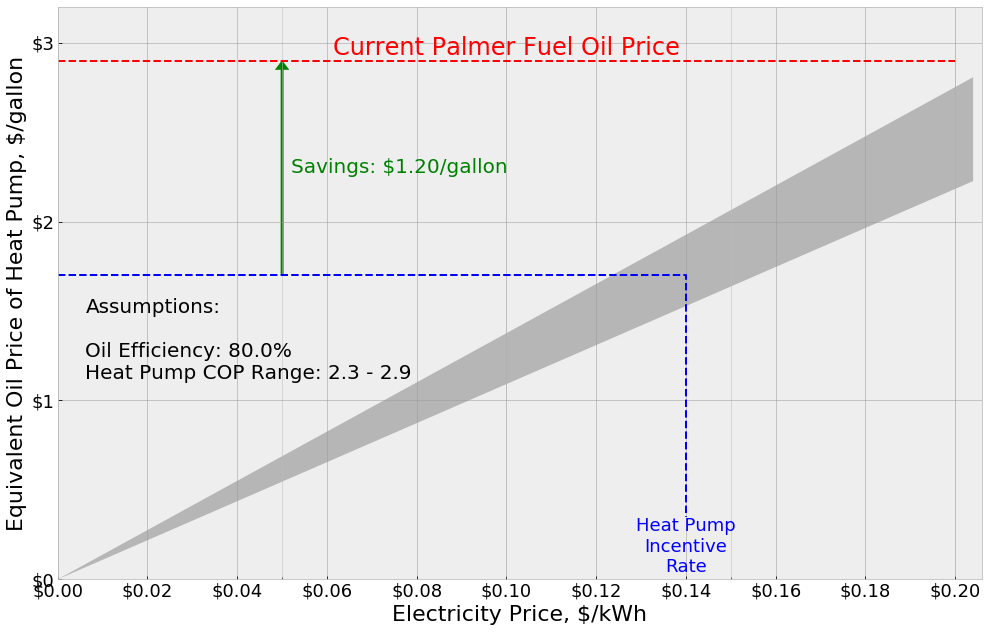

In [28]:
show_production_cost = False
lbl_prod_savings = False

#ret_rate = 0.2203 * 1.06
#ret_rate = 0.1939
ret_rate = 0.14
#rate_title = 'MEA\nResidential\nRate'
rate_title = 'Heat Pump\nIncentive\nRate'

prod_cost = 0.065 / 0.95        # electricity production cost
prod_cost_lbl = 'MEA\nProduction\nCost'

max_elec_price = 0.2
oil_price = 2.9
oil_price_lbl = 'Current Palmer Fuel Oil Price'
oil_effic = 0.8

cop_low = 2.3
cop_high = 2.9
cop_avg = (cop_low + cop_high) / 2.0

plt.rc('ytick',labelsize=18)
plt.rc('xtick',labelsize=18)

minorLocatorX = MultipleLocator(0.05)
majorLocatorY = MultipleLocator(1.0)

formatter2 = FuncFormatter(lambda x, pos: '$%.2f' % x)
formatter0 = FuncFormatter(lambda x, pos: '$%.0f' % x)

fig, ax = plt.subplots()
fig.set_size_inches(14, 9)
ax.xaxis.set_major_formatter(formatter2)
ax.yaxis.set_major_formatter(formatter0)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
#majorLocator = MultipleLocator(20)

plt.grid(b=True, which='minor', color='#BBBBBB', linestyle='-')
plt.grid(b=True, which='major', color='#999999', linestyle='-')


elec_prices = np.arange(0, max_elec_price+.005, step=max_elec_price/100.)
oil_equiv_low = [equiv_oil_price(cop_high, pr, oil_effic) for pr in elec_prices]
oil_equiv_high = [equiv_oil_price(cop_low, pr, oil_effic) for pr in elec_prices]

ax.fill_between(elec_prices, oil_equiv_low, oil_equiv_high, facecolor='gray', alpha=0.5)

plt.xlim(0, max_elec_price*1.03)

plt.xlabel('Electricity Price, $/kWh', fontsize=22)
plt.ylabel('Equivalent Oil Price of Heat Pump, $/gallon', fontsize=22)

if show_production_cost:
    # Calculate the Equiv. Oil price for the Production Cost
    prod_lbl_y = 0.35
    prod_equiv_avg = equiv_oil_price(cop_avg, prod_cost, oil_effic)
    plt.plot([0, prod_cost, prod_cost], [prod_equiv_avg, prod_equiv_avg, prod_lbl_y], 'b--')
    plt.annotate(
        prod_cost_lbl,
        xy=(prod_cost, prod_lbl_y),
        horizontalalignment='center',
        verticalalignment='top',
        color='blue',
        fontsize=18
    )

# Calculate the Equiv. Oil price for the Retail Rate
ret_lbl_y = 0.35
ret_equiv_avg = equiv_oil_price(cop_avg, ret_rate, oil_effic)
plt.plot([0, ret_rate, ret_rate], [ret_equiv_avg, ret_equiv_avg, ret_lbl_y], 'b--')
plt.annotate(
    rate_title,
    xy=(ret_rate, ret_lbl_y),
    horizontalalignment='center',
    verticalalignment='top',
    color='blue',
    fontsize=18
)

# Plot Horizontal Line at Current Oil Price
plt.plot([0, max_elec_price], [oil_price, oil_price], 'r--')
plt.annotate(
    oil_price_lbl,
    xy=(max_elec_price * 0.5, oil_price+.14),
    horizontalalignment='center',
    verticalalignment='top',
    color='red',
    fontsize=24
)

# Draw Line to illustrate savings
equiv_price = prod_equiv_avg if lbl_prod_savings else ret_equiv_avg
savings = oil_price - equiv_price
ax.arrow(.05, equiv_price, 0.0, savings, 
         width=.0005,
         head_width=0.003, 
         head_length=0.05,
         length_includes_head=True,
         fc='green', 
         ec='green')
plt.annotate(
    'Savings: $%.2f/gallon' % savings,
    xy=(0.052, equiv_price + savings/2),
    color='green',
    fontsize=20,
    verticalalignment='center',
)

# List Assumuptions
plt.annotate(
    'Assumptions:\n\nOil Efficiency: %.1f%%\nHeat Pump COP Range: %.1f - %.1f' % (oil_effic * 100.0, cop_low, cop_high),
    xy=(.03, .35),
    #xy=(0.64, 0.25),
    xycoords='axes fraction',
    fontsize=20
)

plt.ylim(0,3.2)
plt.xticks(np.arange(0.0, 0.21, 0.02))

#plt.title('Determine Equivalent Oil Price of a Heat Pump', fontsize=26)
plt.tight_layout()
plt.savefig('equiv_oil_price.png')